In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## **Exercise: Multiple Linear Regression**

**Analyze diamonds dataset**

     - Carat, depth, table, x, y, z as numerical independent variable
     - Cut, color, clarity as categorical independent variable
     - Price as dependent variable

- Analyze the relationship
- Apply Multiple Linear Regression with dummy variable
- Check multicollinearity
- Check the assumptions
- Interpret the result
- Use α 5% (α = 0.05)

**Try to find the best model without any multicollinearity**


## **Dataset info**
https://www.kaggle.com/drvader/diamonds-dataset-exploration-and-regression/data

A data frame with 53940 rows and 10 variables:

1. price<br>
price in US dollars (\$326--\$18,823)
<br><br>
2. carat<br>
weight of the diamond (0.2--5.01)
<br><br>
3. cut<br>
quality of the cut (Fair, Good, Very Good, Premium, Ideal)
<br><br>
4. color<br>
diamond colour, from J (worst) to D (best)
<br><br>
5. clarity<br>
a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
<br><br>
6. x<br>
length in mm (0--10.74)
<br><br>
7. y<br>
width in mm (0--58.9)
<br><br>
8. z<br>
depth in mm (0--31.8)
<br><br>
9. depth<br>
total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
<br><br>
10. table<br>
width of top of diamond relative to widest point (43--95)

In [29]:
# Load dataset
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [31]:
df.duplicated().sum()

146

In [32]:
df.drop_duplicates(inplace=True)

In [33]:
filtered_data = df.copy()

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        Q1 = filtered_data[column].quantile(0.25)
        Q3 = filtered_data[column].quantile(0.75)
        IQR = Q3 - Q1     
        outliers = (filtered_data[column] < Q1 - 1.5 * IQR) | (filtered_data[column] > Q3 + 1.5 * IQR)
        filtered_data = filtered_data[~outliers]
    else:
        pass

filtered_data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [34]:
df2 = filtered_data.reset_index()
df2

,index,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...,...
46420,53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
46421,53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
46422,53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
46423,53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [35]:
df2.drop(columns='index', inplace=True)
df2

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
46420,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
46421,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
46422,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
46423,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [36]:
Y=df2['price']
Y

0         326
1         326
2         334
3         335
4         336
         ... 
46420    2757
46421    2757
46422    2757
46423    2757
46424    2757
Name: price, Length: 46425, dtype: int64

In [37]:
X = df2.drop(columns='price')
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...
46420,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
46421,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
46422,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
46423,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


# Multicollinearity

In [38]:
X=pd.get_dummies(X,drop_first=True, dtype=int)
X

,carat,depth,table,x,y,z,cut_Premium,cut_Very Good,cut_Good,cut_Fair,...,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,3.89,3.84,2.31,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.29,62.4,58.0,4.20,4.23,2.63,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0.31,63.3,58.0,4.34,4.35,2.75,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,0.24,62.8,57.0,3.94,3.96,2.48,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46420,0.72,60.8,57.0,5.75,5.76,3.50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
46421,0.72,63.1,55.0,5.69,5.75,3.61,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
46422,0.70,62.8,60.0,5.66,5.68,3.56,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
46423,0.86,61.0,58.0,6.15,6.12,3.74,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [39]:
def cal_VIF(X):
    LVIF = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
    VIF = pd.DataFrame({'feature':X.columns,'VIF':LVIF})
    return VIF

In [40]:
dcVIF=[]
while cal_VIF(X.drop(columns=dcVIF))['VIF'].max() > 4:
    dcVIF.append((cal_VIF(X.drop(columns=dcVIF))[cal_VIF(X.drop(columns=dcVIF))['VIF']==cal_VIF(X.drop(columns=dcVIF))['VIF'].max()]).iloc[0]['feature'])
    X.drop(columns=dcVIF)

In [41]:
cal_VIF(X.drop(columns=dcVIF))

,feature,VIF
0,cut_Premium,1.629112
1,cut_Very Good,1.551788
2,cut_Good,1.206855
3,cut_Fair,1.024081
4,color_E,2.140741
5,color_F,2.030669
6,color_G,2.191424
7,color_H,1.870168
8,color_I,1.557861
9,color_J,1.289545


In [42]:
dcVIF

['x', 'z', 'y', 'table', 'depth', 'carat']

In [43]:
X.drop(columns=['x', 'z', 'y', 'table', 'depth'], inplace=True)
X

,carat,cut_Premium,cut_Very Good,cut_Good,cut_Fair,color_E,color_F,color_G,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0.21,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.29,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,0.31,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0.24,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46420,0.72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
46421,0.72,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
46422,0.70,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
46423,0.86,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [44]:
X = sm.add_constant(X)
X

,const,carat,cut_Premium,cut_Very Good,cut_Good,cut_Fair,color_E,color_F,color_G,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,1.0,0.23,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,1.0,0.21,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1.0,0.29,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,1.0,0.31,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1.0,0.24,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46420,1.0,0.72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
46421,1.0,0.72,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
46422,1.0,0.70,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
46423,1.0,0.86,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


# Modeling

In [45]:
model = sm.OLS(Y,X).fit()

In [46]:
if model.f_pvalue < 0.05:
    print(f'pvalue = {model.f_pvalue}, Menerima Ha = setidaknya salah satu fitur berpengaruh terhadap target')
else:
    print(f'pvalue = {model.f_pvalue}, Menerima Ho = tidak ada salah satu fitur pun yang berpengaruh terhadap target')

pvalue = 0.0, Menerima Ha = setidaknya salah satu fitur berpengaruh terhadap target


In [47]:
model.pvalues

const             0.000000e+00
carat             0.000000e+00
cut_Premium       6.444980e-29
cut_Very Good     1.504135e-32
cut_Good          2.701287e-53
cut_Fair          1.426993e-29
color_E           2.639188e-46
color_F           7.474822e-74
color_G          7.779936e-168
color_H           0.000000e+00
color_I           0.000000e+00
color_J           0.000000e+00
clarity_VVS1      1.522809e-10
clarity_VVS2      1.812729e-10
clarity_VS1      4.625944e-115
clarity_VS2      2.004168e-296
clarity_SI1       0.000000e+00
clarity_SI2       0.000000e+00
clarity_I1        0.000000e+00
dtype: float64

Semua Beta lebih kecil dari 0.05 sehingga menerima Ha: setiap fitur berpengaruh terhadap target

In [48]:
for i in range(len(model.params.index)):
    print(f'Setiap kenaikan nilai = 1 (kehadiran untuk jenis kategori) dari feature {model.params.index[i]} menambah target sebesar {model.params[i]}')

Setiap kenaikan nilai = 1 (kehadiran untuk jenis kategori) dari feature const menambah target sebesar -956.8600252975954
Setiap kenaikan nilai = 1 (kehadiran untuk jenis kategori) dari feature carat menambah target sebesar 7628.638154451948
Setiap kenaikan nilai = 1 (kehadiran untuk jenis kategori) dari feature cut_Premium menambah target sebesar -95.10187656731229
Setiap kenaikan nilai = 1 (kehadiran untuk jenis kategori) dari feature cut_Very Good menambah target sebesar -103.17381954420094
Setiap kenaikan nilai = 1 (kehadiran untuk jenis kategori) dari feature cut_Good menambah target sebesar -200.73363018354735
Setiap kenaikan nilai = 1 (kehadiran untuk jenis kategori) dari feature cut_Fair menambah target sebesar -503.051710261071
Setiap kenaikan nilai = 1 (kehadiran untuk jenis kategori) dari feature color_E menambah target sebesar -172.30411318513345
Setiap kenaikan nilai = 1 (kehadiran untuk jenis kategori) dari feature color_F menambah target sebesar -223.17784646265815
Setiap

In [49]:
print(f'Model ini dapat dijelaskan sebesar {round((model.rsquared_adj)*100)} % oleh feature model tersebut, sisanya dapat dijelaskan oleh feature lain.')

Model ini dapat dijelaskan sebesar 92 % oleh feature model tersebut, sisanya dapat dijelaskan oleh feature lain.


# Residual Analysis

In [50]:
residual = model.resid
residual

0        1596.767255
1        1153.600142
2         933.936633
3        2666.011060
4        1340.825067
            ...     
46420    -573.411307
46421    -372.677677
46422    -317.664724
46423    -190.851581
46424    -111.428698
Length: 46425, dtype: float64

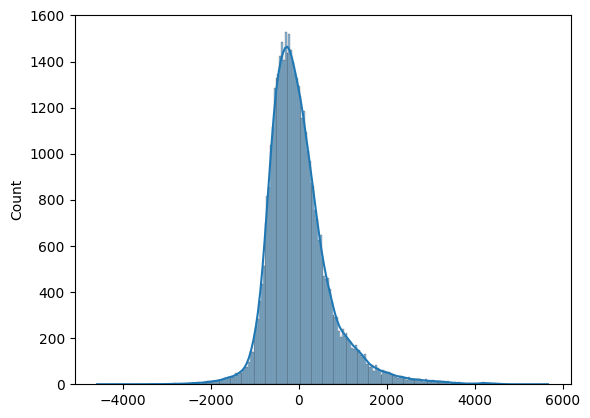

In [51]:
sns.histplot(residual,kde=True)
plt.show()

In [52]:
residual.mean()

-4.398330091210418e-12

Gauss Markov terpenuhi (rata2 residual mendekati 0)

# Biased and Homoscedenticity

In [55]:
predict = model.predict(X)
predict

0       -1270.767255
1        -827.600142
2        -599.936633
3       -2331.011060
4       -1004.825067
            ...     
46420    3330.411307
46421    3129.677677
46422    3074.664724
46423    2947.851581
46424    2868.428698
Length: 46425, dtype: float64

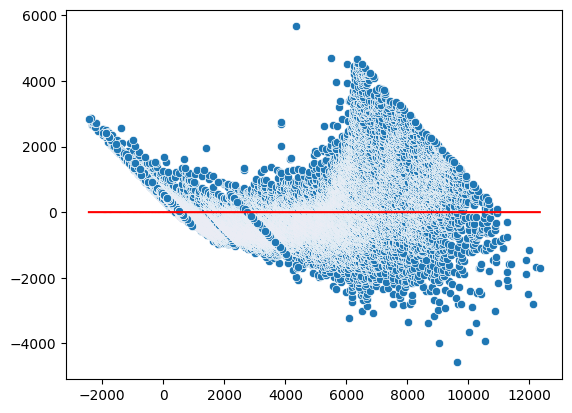

In [56]:
sns.scatterplot(x=predict, y=residual)
sns.lineplot(x=predict, y=0, color='red')
plt.show()

Uncorelated Error tidak terpenuhi (Biased) dan Homoscedasticity tidak terpenuhi (Heterocedasticity)